<a href="https://colab.research.google.com/github/HaseebUlHassan437/Data-Augmentation-using-keras/blob/main/data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **If You don't have enough data for training **
# apply Data Augmentation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

save_dir = '/content/augmented_images'
os.makedirs(save_dir, exist_ok=True)
print(f"Directory created at {save_dir}")


Directory created at /content/augmented_images


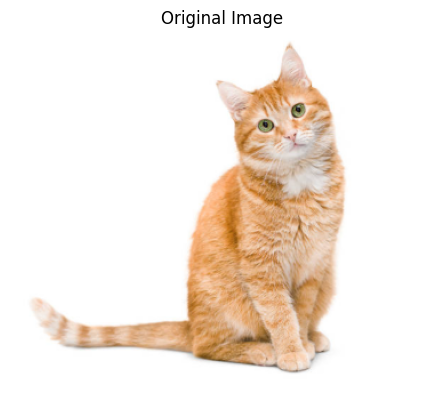

In [6]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img

image_path = "/content/drive/MyDrive/cat.png"

# Load and show the image
img = load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()


In [9]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

img = load_img(image_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)



In [10]:
!pip install tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,  # ❌ vertical flip disabled
    fill_mode='nearest'
)

In [11]:
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, save_prefix='aug', save_format='jpg'):
    i += 1
    if i >= 10:
        break

print("✅ 10 augmented images saved to:", save_dir)


✅ 10 augmented images saved to: /content/augmented_images


## **Augmented Images**

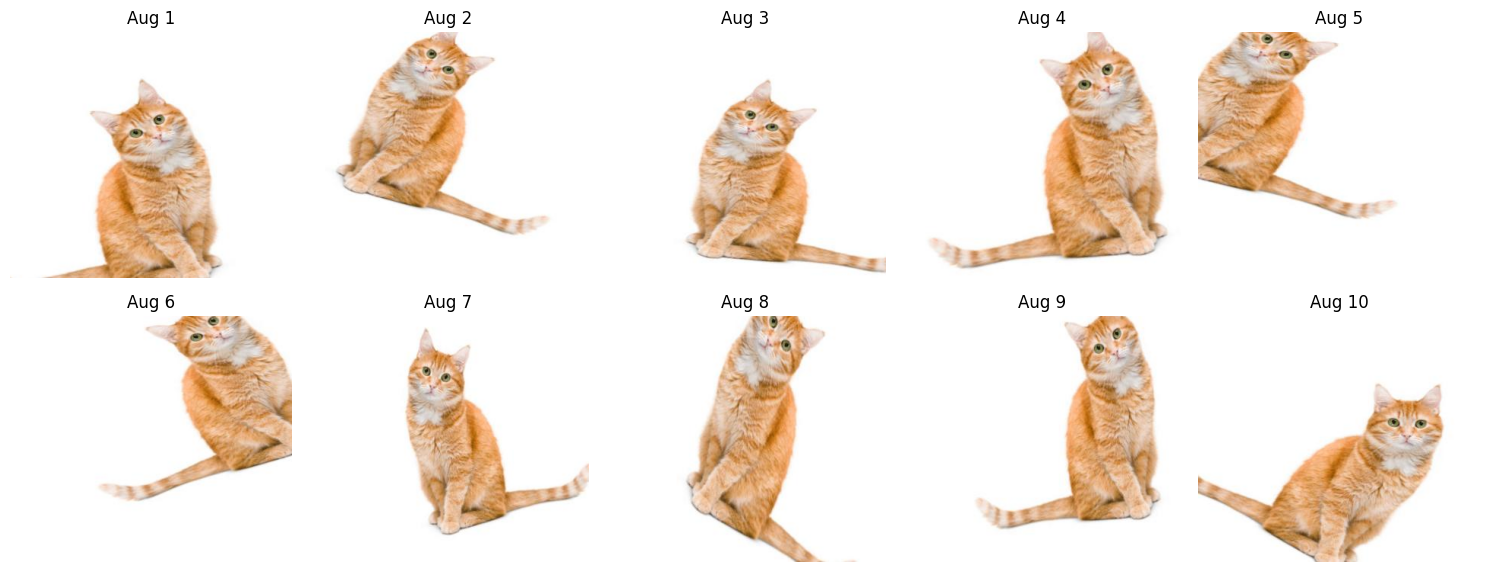

In [13]:
from PIL import Image
image_dir = '/content/augmented_images'
image_files = sorted(os.listdir(image_dir))[:10]  # First 10 images only

# Set up a 2x5 grid
plt.figure(figsize=(15, 6))
for i, file in enumerate(image_files):
    img_path = os.path.join(image_dir, file)
    img = Image.open(img_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Aug {i+1}")

plt.tight_layout()
plt.show()